In [ ]:
! pip install pandas numpy matplotlib seaborn

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

%matplotlib inline
plt.style.use('ggplot')

DATA_PATH = '/Users/mostafazamaniturk/Documents/USD/AAI-530/work/stress_predictions_for_tableau_v2.csv'

In [12]:
df = pd.read_csv(DATA_PATH)
df.head(10)

,subject,window_start_sec,window_end_sec,true_label,predicted_stress,predicted_stress_label
0,S16,165.0,194.984375,0,0,non-stress
1,S16,180.0,209.984375,0,0,non-stress
2,S16,195.0,224.984375,0,0,non-stress
3,S16,210.0,239.984375,0,0,non-stress
4,S16,225.0,254.984375,0,0,non-stress
5,S16,240.0,269.984375,0,0,non-stress
6,S16,255.0,284.984375,0,0,non-stress
7,S16,270.0,299.984375,0,0,non-stress
8,S16,285.0,314.984375,0,0,non-stress
9,S16,300.0,329.984375,0,0,non-stress


In [13]:
df.tail(10)

,subject,window_start_sec,window_end_sec,true_label,predicted_stress,predicted_stress_label
304,S17,4185.0,4214.984375,1,1,stress
305,S17,4200.0,4229.984375,1,1,stress
306,S17,4215.0,4244.984375,1,1,stress
307,S17,4230.0,4259.984375,1,1,stress
308,S17,4245.0,4274.984375,1,1,stress
309,S17,4260.0,4289.984375,1,1,stress
310,S17,4275.0,4304.984375,1,0,non-stress
311,S17,4290.0,4319.984375,1,0,non-stress
312,S17,4305.0,4334.984375,1,0,non-stress
313,S17,4320.0,4349.984375,1,0,non-stress


In [14]:
df.describe()


,window_start_sec,window_end_sec,true_label,predicted_stress
count,314.00000,314.000000,314.000000,314.000000
mean,1946.56051,1976.544885,0.312102,0.273885
std,1430.69113,1430.691130,0.464091,0.446663
min,165.00000,194.984375,0.000000,0.000000
25%,750.00000,779.984375,0.000000,0.000000
50%,1335.00000,1364.984375,0.000000,0.000000
75%,2711.25000,2741.234375,1.000000,1.000000
max,4755.00000,4784.984375,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 314 entries, 0 to 313
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   subject                 314 non-null    object 
 1   window_start_sec        314 non-null    float64
 2   window_end_sec          314 non-null    float64
 3   true_label              314 non-null    int64  
 4   predicted_stress        314 non-null    int64  
 5   predicted_stress_label  314 non-null    object 
dtypes: float64(2), int64(2), object(2)
memory usage: 14.8+ KB


## EDA & Tableau Public exports

Below we add derived metrics, per-subject summaries, and confusion counts; then export **CSVs** and **PNG charts** into a `tableau_export` folder (next to the data file) for use in Tableau Public.

In [16]:
# ============================================
# EDA: Derived columns and key metrics (for Tableau)
# ============================================
# Add column for correct prediction (1 = correct, 0 = wrong)
df['correct'] = (df['true_label'] == df['predicted_stress']).astype(int)
# Optional: human-readable outcome for Tableau tooltips
df['outcome'] = df['correct'].map({1: 'Correct', 0: 'Incorrect'})

# Overall metrics
n_total = len(df)
n_correct = df['correct'].sum()
overall_accuracy = n_correct / n_total if n_total else 0
print("=== Overall metrics ===")
print(f"Total windows: {n_total}")
print(f"Correct predictions: {n_correct}")
print(f"Overall accuracy: {overall_accuracy:.2%}")

# Confusion matrix counts (true_label: 0=non-stress, 1=stress)
tp = ((df['true_label'] == 1) & (df['predicted_stress'] == 1)).sum()
tn = ((df['true_label'] == 0) & (df['predicted_stress'] == 0)).sum()
fp = ((df['true_label'] == 0) & (df['predicted_stress'] == 1)).sum()
fn = ((df['true_label'] == 1) & (df['predicted_stress'] == 0)).sum()
print(f"\n=== Confusion matrix (counts) ===")
print(f"  TP: {tp}  |  FP: {fp}")
print(f"  FN: {fn}  |  TN: {tn}")

# Label distribution
print("\n=== Label distribution ===")
print("True label:", df['true_label'].value_counts().sort_index().to_dict())
print("Predicted:", df['predicted_stress_label'].value_counts().to_dict())

=== Overall metrics ===
Total windows: 314
Correct predictions: 272
Overall accuracy: 86.62%

=== Confusion matrix (counts) ===
  TP: 71  |  FP: 15
  FN: 27  |  TN: 201

=== Label distribution ===
True label: {0: 216, 1: 98}
Predicted: {'non-stress': 228, 'stress': 86}


In [17]:
# Per-subject summary (main Tableau dataset: use for subject-level dashboards)
summary_by_subject = df.groupby('subject').agg(
    n_windows=('correct', 'count'),
    n_correct=('correct', 'sum'),
    n_stress_true=('true_label', 'sum'),
    n_stress_pred=('predicted_stress', 'sum'),
).reset_index()
summary_by_subject['accuracy'] = (summary_by_subject['n_correct'] / summary_by_subject['n_windows']).round(4)
summary_by_subject['n_incorrect'] = summary_by_subject['n_windows'] - summary_by_subject['n_correct']
print("Per-subject summary (for Tableau):")
display(summary_by_subject)

Per-subject summary (for Tableau):


,subject,n_windows,n_correct,n_stress_true,n_stress_pred,accuracy,n_incorrect
0,S16,155,155,48,48,1.0000,0
1,S17,159,117,50,38,0.7358,42


In [18]:
# Confusion matrix as table (for Tableau: crosstab)
confusion_crosstab = pd.crosstab(
    df['true_label'].map({0: 'non-stress', 1: 'stress'}),
    df['predicted_stress_label'],
    margins=True,
    margins_name='Total'
)
confusion_crosstab.index.name = 'true_label'
print("Confusion matrix (rows=true, cols=predicted):")
display(confusion_crosstab)

Confusion matrix (rows=true, cols=predicted):


predicted_stress_label,non-stress,stress,Total
true_label,,,
non-stress,201,15,216
stress,27,71,98
Total,228,86,314


In [19]:
# ============================================
# Export CSVs for Tableau Public
# ============================================
# Output folder: same directory as data, or ./tableau_export if path is missing
OUTPUT_DIR = os.path.join(os.path.dirname(os.path.abspath(DATA_PATH)), 'tableau_export')
if not os.path.exists(os.path.dirname(DATA_PATH)) or not os.path.isdir(os.path.dirname(DATA_PATH)):
    OUTPUT_DIR = 'tableau_export'
os.makedirs(OUTPUT_DIR, exist_ok=True)
print(f"Tableau export folder: {os.path.abspath(OUTPUT_DIR)}")

# 1. Full data with EDA columns (for detailed Tableau sheets)
df.to_csv(os.path.join(OUTPUT_DIR, 'stress_predictions_with_eda.csv'), index=False)
print("Saved: stress_predictions_with_eda.csv")

# 2. Per-subject summary (for subject-level KPIs and bar charts)
summary_by_subject.to_csv(os.path.join(OUTPUT_DIR, 'summary_by_subject.csv'), index=False)
print("Saved: summary_by_subject.csv")

# 3. Confusion matrix long-form (for Tableau: true_label, predicted_label, count)
confusion_long = df.groupby(['true_label', 'predicted_stress', 'predicted_stress_label']).size().reset_index(name='count')
confusion_long['true_label_name'] = confusion_long['true_label'].map({0: 'non-stress', 1: 'stress'})
confusion_long.to_csv(os.path.join(OUTPUT_DIR, 'confusion_matrix_long.csv'), index=False)
print("Saved: confusion_matrix_long.csv")

# 4. Overall metrics one-row table (for Tableau text/KPI)
overall_metrics = pd.DataFrame([{
    'total_windows': n_total,
    'n_correct': n_correct,
    'overall_accuracy': round(overall_accuracy, 4),
    'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn
}])
overall_metrics.to_csv(os.path.join(OUTPUT_DIR, 'overall_metrics.csv'), index=False)
print("Saved: overall_metrics.csv")

Tableau export folder: /Users/mostafazamaniturk/Documents/USD/AAI-530/work/tableau_export
Saved: stress_predictions_with_eda.csv
Saved: summary_by_subject.csv
Saved: confusion_matrix_long.csv
Saved: overall_metrics.csv


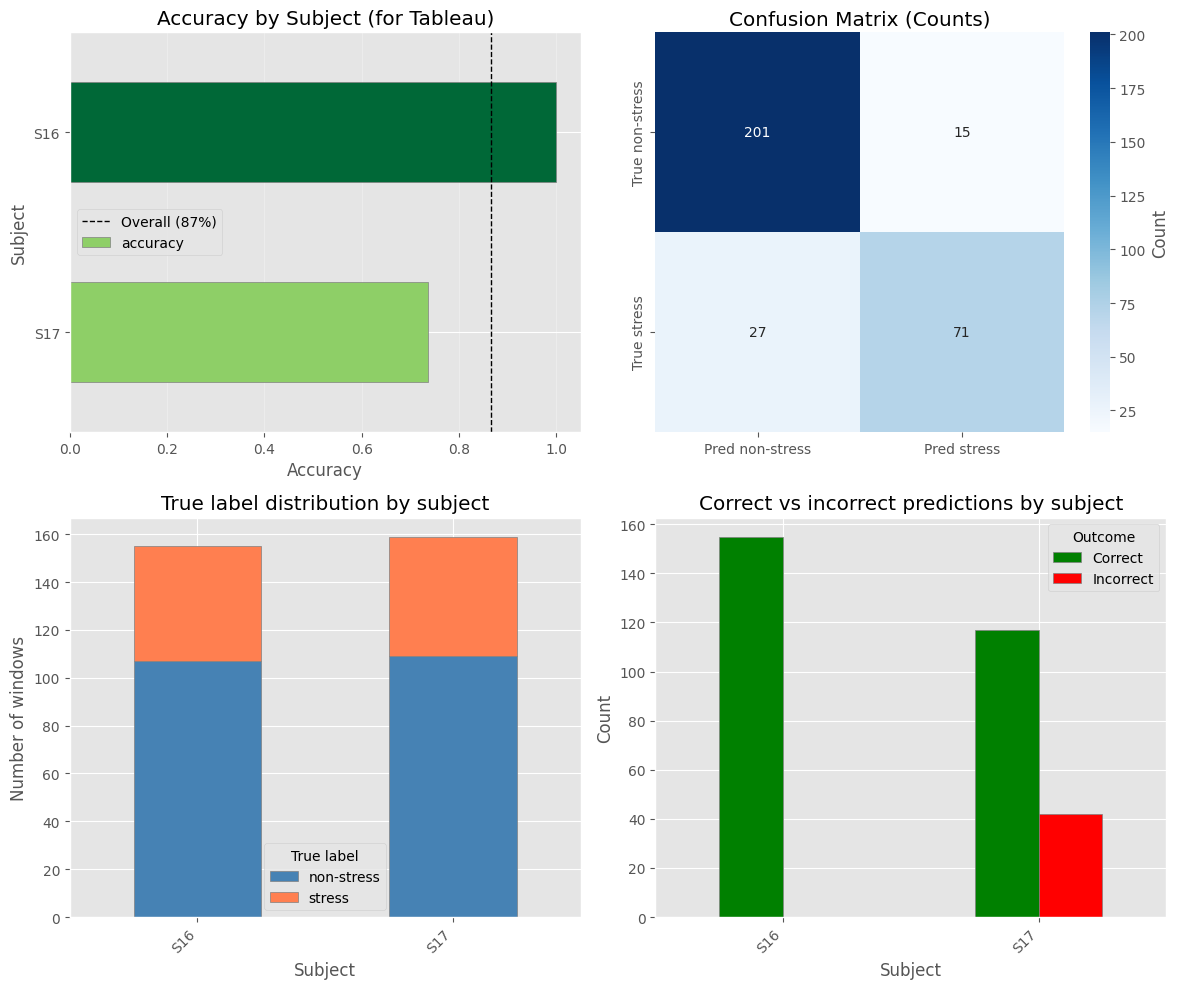

Saved: /Users/mostafazamaniturk/Documents/USD/AAI-530/work/tableau_export/eda_tableau_summary.png


In [20]:
# ============================================
# Visualizations (saved as PNG for Tableau / reports)
# ============================================
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Accuracy by subject (bar chart)
ax = axes[0, 0]
subj_order = summary_by_subject.sort_values('accuracy')['subject']
summary_sorted = summary_by_subject.set_index('subject').loc[subj_order]
colors = [plt.cm.RdYlGn(acc) for acc in summary_sorted['accuracy']]
summary_sorted['accuracy'].plot(kind='barh', ax=ax, color=colors, edgecolor='gray')
ax.axvline(overall_accuracy, color='black', linestyle='--', linewidth=1, label=f'Overall ({overall_accuracy:.0%})')
ax.set_xlabel('Accuracy')
ax.set_ylabel('Subject')
ax.set_title('Accuracy by Subject (for Tableau)')
ax.set_xlim(0, 1.05)
ax.legend()
ax.grid(axis='x', alpha=0.3)

# 2. Confusion matrix heatmap
ax = axes[0, 1]
cm = np.array([[tn, fp], [fn, tp]])
labels = [['TN', 'FP'], ['FN', 'TP']]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax,
            xticklabels=['Pred non-stress', 'Pred stress'],
            yticklabels=['True non-stress', 'True stress'],
            cbar_kws={'label': 'Count'})
ax.set_title('Confusion Matrix (Counts)')

# 3. True vs predicted distribution (stacked bar by subject)
ax = axes[1, 0]
subject_counts = df.groupby(['subject', 'true_label']).size().unstack(fill_value=0)
subject_counts.columns = ['non-stress', 'stress']
subject_counts.plot(kind='bar', stacked=True, ax=ax, color=['steelblue', 'coral'], edgecolor='gray')
ax.set_xlabel('Subject')
ax.set_ylabel('Number of windows')
ax.set_title('True label distribution by subject')
ax.legend(title='True label')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

# 4. Correct vs incorrect by subject
ax = axes[1, 1]
correct_by_subj = df.groupby(['subject', 'outcome']).size().unstack(fill_value=0)
correct_by_subj.plot(kind='bar', ax=ax, color=['green', 'red'], edgecolor='gray')
ax.set_xlabel('Subject')
ax.set_ylabel('Count')
ax.set_title('Correct vs incorrect predictions by subject')
ax.legend(title='Outcome')
plt.setp(ax.xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'eda_tableau_summary.png'), dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: {os.path.join(OUTPUT_DIR, 'eda_tableau_summary.png')}")

### Using these outputs in Tableau Public

- **stress_predictions_with_eda.csv** — Detail: one row per window; use for filters, tooltips, and time (window_start_sec).
- **summary_by_subject.csv** — Subject-level KPIs: accuracy, n_correct, n_windows; use for bar charts and summary cards.
- **confusion_matrix_long.csv** — True vs predicted counts; use for heatmaps or grouped bars.
- **overall_metrics.csv** — One row: total_windows, overall_accuracy, TP/TN/FP/FN; use for KPI text or parameters.
- **PNG files** — Use as images in dashboards or export as reference.

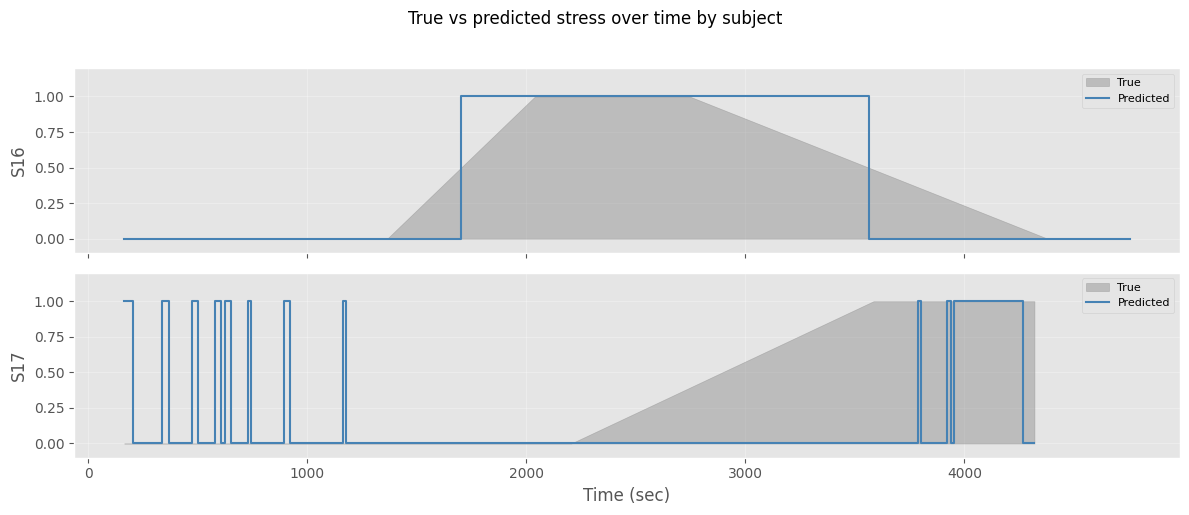

Saved: predictions_over_time_by_subject.png


In [21]:
# Extra: Prediction vs time (for Tableau time-series / dual-axis)
# Each row is one window; use window_start_sec as time axis in Tableau
fig, axes = plt.subplots(len(df['subject'].unique()), 1, figsize=(12, 2.5 * len(df['subject'].unique())), sharex=True)
if len(df['subject'].unique()) == 1:
    axes = [axes]
for ax, subj in zip(axes, sorted(df['subject'].unique())):
    d = df[df['subject'] == subj].sort_values('window_start_sec')
    ax.fill_between(d['window_start_sec'], 0, d['true_label'], alpha=0.4, label='True', color='gray')
    ax.step(d['window_start_sec'], d['predicted_stress'], where='mid', label='Predicted', color='steelblue')
    ax.set_ylabel(subj)
    ax.set_ylim(-0.1, 1.2)
    ax.legend(loc='upper right', fontsize=8)
    ax.grid(True, alpha=0.3)
axes[-1].set_xlabel('Time (sec)')
fig.suptitle('True vs predicted stress over time by subject', y=1.02)
plt.tight_layout()
plt.savefig(os.path.join(OUTPUT_DIR, 'predictions_over_time_by_subject.png'), dpi=150, bbox_inches='tight')
plt.show()
print(f"Saved: predictions_over_time_by_subject.png")